
-------
# Advection of magnetic fields

# Case 1 - ${\bf B} = B {\bf e}_z$ and ${\bf v} = v_x {\bf e}_x + v_y {\bf e}_y$ in a 2D sheet ($\partial_z = 0$)

- Assumptions: Let us consider a velocity field orthogonal to the magnetic field. Without loss of generality, we rotate the frame of reference such that ${\bf B} = B_z(x,y) {\bf e}_z$ and ${\bf v} = v_x(x,y) {\bf e}_x + v_y(x,y) {\bf e}_y$.


- Induction equation: Under the assumptions above, the term ${\bf v\cdot \nabla {\bf B}}$ vanishes, and the induction equation becomes

\begin{equation}
\frac{\partial B_z}{\partial t} + {\bf v} \cdot \nabla{B_z} = - {B_z} \nabla \cdot {\bf v}\,,
\end{equation}

which can be written in conservative form:

\begin{equation}
\frac{\partial B_z}{\partial t} + \nabla \cdot \left( B_z {\bf v}\right) = 0\,.
\end{equation}

So, the magnetic field is passively advected by the velocity field. It behaves as the density in the continuity equation, so it can be solved using the solvers you already know.


- Solenoidal constraint: For any given time, the magnetic field is of the form:

\begin{equation}
{\bf B}(x,y,t) = B_z(x,y,t) {\bf e}_z, 
\end{equation}

so, its divergence is:

\begin{equation}
\nabla \cdot {\bf B} = \partial_z \left( {B_z}(x,y,t)\right) = 0\,,
\end{equation}

which is a property independent of the method used to update the field.

### Task 1:

#### Implement an advection scheme (1D or 2D) and advect a magnetic field perpendicular to a given velocity field.

## 1D

In [66]:
import numpy as np 
import matplotlib.pyplot as plt

In [67]:
#we define the magnetic field
def magnetic_field(n):
    return np.ones((n,n))

#we define the derivative of a function 
def deriv(f,ds,axis=0):
    return (np.roll(f,-1,axis=0)-np.roll(f,+1,axis=0))/(2.0*ds)

#we define the derivative of a function for different axis, usefull for partial derivatives
def deriv1(f,ds,axis=1):
    return (np.roll(f,-1,axis=1)-np.roll(f,+1,axis=1))/(2.0*ds)

#define the veloxity on x direction
def velocity_x(n): 
    return np.ones((n,n))

#define the veloxity on y direction
def velocity_y(n):
    return np.ones((n,n))

#define the Courant time
def Courant(v,dx,C=0.2):
    speed = abs(v)
    dt = C * dx / np.max(speed)
    return dt


We know that \begin{equation}
\frac{\partial B_z}{\partial t} = - \frac{\partial (B_z\cdot v_x)}{\partial x} - \frac{\partial (B_z\cdot v_y)}{\partial y}.
\end{equation}. Thus the time derivative of the magnetic field could be calculated as: \begin{equation}
B_{new} = B_{old} - \Delta t \left(\frac{\partial (B_z\cdot v_x)}{\partial x} + \frac{\partial (B_z\cdot v_y)}{\partial y}\right).
\end{equation}

128


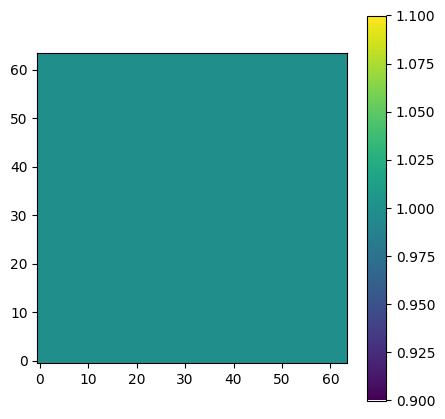

In [70]:
n=64
Lbox=2.
C=0.5
nt=int(n/C+0.5)
ds=Lbox/n
bz=magnetic_field(64)
ux=velocity_x(64)
uy=velocity_y(64)
v=np.sqrt(ux**2+uy**2)
dt=Courant(v,dx)
print(nt)
#Here we make a loop for the calculation of the time derivative of the magnetic field
for i in range(nt):
    bzux=bz*ux
    bzuy=bz*uy
    d_dx=deriv1(bzux,ds)
    d_dy=deriv(bzuy,ds)
    bz=bz-dt*(d_dx+d_dy)
plt.imshow(bzn)
plt.colorbar()


--------
### Task 2: Create a 2D mesh that will constitute the domain of the problem
You may use the code below, which constitutes a partial solution, as a starting point.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
#Some customization
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.origin'] = 'lower'

In [72]:
class Mesh():
    """
    Class to store the domain of the problem
    """
    def __init__(self,xmin,xmax,ymin,ymax,nx,ny):
        
        # Parameters
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.nx   = nx
        self.ny   = ny
        self.extent = [xmin,xmax,ymin,ymax] #Useful for imshow

        # The mesh is created here....
        x    = np.linspace(xmin,xmax,nx)
        y    = np.linspace(ymin,ymax,ny)
        self.dx   =x[1]-x[0]
        self.dy   = y[1]-y[0]
        self.r     = np.sqrt(x**2+y**2)
            
        #This is the 2D mesh
        self.x,self.y = np.meshgrid(x,y)

mesh = Mesh(-0.5,0.5,-0.5,0.5,200,200)#This is how we use the mesh class

-----------------
### Task 3: Initialize the external velocity field ${\bf v}$ on the mesh and plot it

The test problem suggested is to initialize a rotating region and magnetic lines parallel to the y-axis. This test is similar to the well-known (full MHD) rotor test.

The test consists in definining a rotating region centered at $x_0=y_0=0$, described by:

\begin{align}
v_x &= \left\{
\begin{array}{cl}
  -v_\theta\sin{\theta} & r \leq r_1 \\
  -f(r)v_\theta\sin{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber \\
v_y &= \left\{
\begin{array}{cl}
  v_\theta\cos{\theta} & r \leq r_1 \\
  f(r)v_\theta\cos{\theta} & r_1 < r < r_2 \\
  0 & r \geq r_2\\
\end{array}\right. \nonumber
\end{align}

with $r=\sqrt{x^2+y^2}$, $\tan{\theta} = y/x$, $v_{\theta} = \Omega_0 r$, and the smoothing function $f(r)=(r_2-r)/(r_2-r_1)$. $\Omega_0$ is the angular frequency of the rotating region.

#### Suggested parameters for the mesh:

$x_{\rm min} = -0.5$, $x_{\rm max} =  0.5$, 

$y_{\rm min} = -0.5$, $y_{\rm max} =  0.5$ 

$\Omega_0 = 1.0$ 

$r_1 = 0.3$, $r_2 = 1.1 r_1$

In [74]:
def velocity_field(mesh, r1, omega0):
    
    """
    Returns the velocity field
    """
    
    r2      = 1.1*r1 # Smoothing (10%)

    # Definitions
    r     = np.sqrt(mesh.x**2+mesh.y**2) # Polar radius 
    theta = np.arctan2(mesh.y,mesh.x)  # Polar angle
    vphi  = omega0*r # Azimuthal velocity
    f     = (r2-r)/(r2-r1) # Smoothing function

    # Velocity arrays
    vx   = np.zeros(mesh.x.shape)
    vy   = np.zeros(mesh.x.shape)

   # Initialize the velocity field
    '''
    mask2 = (r<r2)
    mask1 = (r<r1)
    a=-f*vphi*np.sin(theta) 
    b=-vphi*np.sin(theta)
    vx[mask2] = a[mask2] 
    vy[mask2]=-a[mask2]
    vx[mask1] = b[mask1] 
    vy[mask1]=-b[mask1]  
    '''
    
    vx[r<r2] = -f[r<r2]*vphi[r<r2]*np.sin(theta)[r<r2]
    vy[r<r2] =  f[r<r2]*vphi[r<r2]*np.cos(theta)[r<r2]
    vx[r<=r1] = -vphi[r<=r1]*np.sin(theta)[r<=r1]
    vy[r<=r1] = vphi[r<=r1]*np.cos(theta)[r<=r1]
    
    return vx, vy

# Parameters
omega_0 = 10.0   # Angular frequency of the spinning region
r1      = 0.3   # Radius of the spinning region 
mesh = Mesh(-0.5,0.5,-0.5,0.5,200,200)
vx, vy = velocity_field(mesh,r1,omega_0)


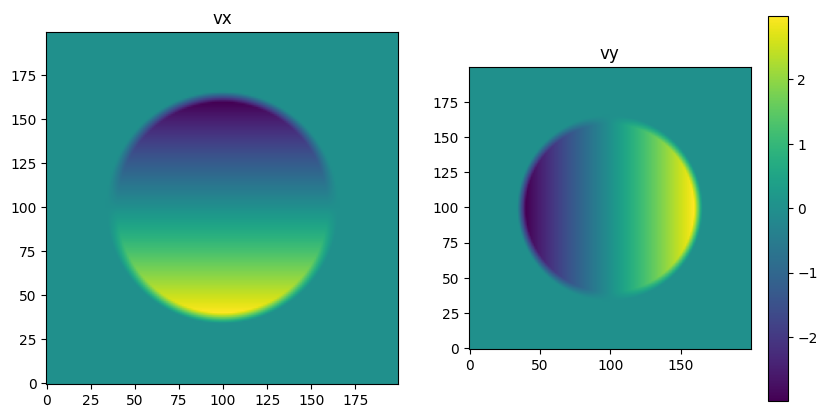

In [75]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("vx")
plt.imshow(vx)

plt.subplot(1,2,2)
plt.title("vy")
plt.imshow(vy)
plt.colorbar(orientation='vertical')
plt.show()

---------
### Task 4: 

#### 4a) Plot streamlines of the velocity field on top of each component of the velocity field (Tip: use streamplot() from matplotlib). 

#### 4b) Does the plot make sense? Explain what you observe.

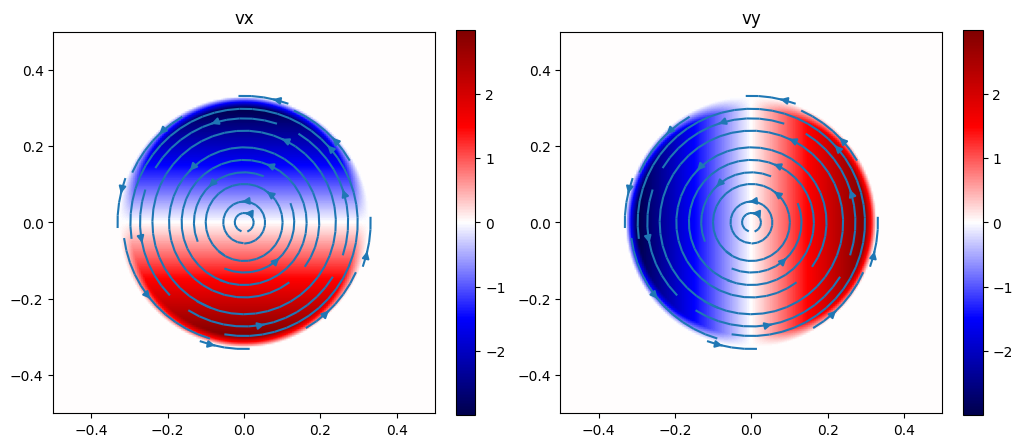

In [77]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("vx")
cm = plt.imshow(vx, extent = mesh.extent, cmap='seismic')
plt.colorbar(cm, fraction = 0.047);
plt.streamplot(mesh.x, mesh.y, vx, vy)


plt.subplot(1,2,2)
plt.title("vy")
cm = plt.imshow(vy, extent = mesh.extent, cmap='seismic')
plt.colorbar(cm, fraction = 0.047);
plt.streamplot(mesh.x,mesh.y,vx,vy)



plt.show()

The above plots are the presentation of the velocity 2D field. On the left plot, the horizontal white line describes the case where vx=0 and thus the only component of velocity remaining is the one at the y direction. Likewise, on the right plot the vertical line implies vy=0 and thus the only component of the velocity being non zero is the vx. Moreover, according to the streamlines, we are expecting to have a circular motion e.g circular velocity field. 

### Task 5: Initial magnetic field

#### 5a) Initialize a constant magnetic field parallel to the y-axis (i.e., $B_x = 0$) using the vector potential.

Help: Since, in the simple problem under consideration ${\bf B} = \partial_y A {\bf e}_x - \partial_x A {\bf e}_y$, if $B_x$ = 0, the potential vector does not depend on $y$. Furthermore, since $B_y$ is constant, the vector potential satisfies:

\begin{equation}
\partial_x A = c
\end{equation}

which implies that the potential vector is of the form:

\begin{equation}
 A(x) = cx + A_0
\end{equation}

#### Take c=1, A_0=0, and initialize the vector potential

(200, 200)


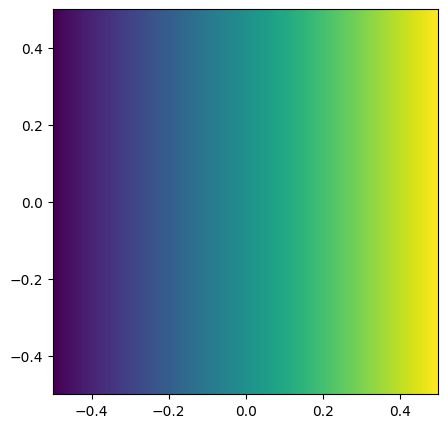

In [78]:
A0 = mesh.x
plt.imshow(A0,extent=mesh.extent)
print(np.shape(A0))

### Task 6: Magnetic lines

Magnetic lines can be plotted with the same function used to plot the streamlines of the velocity field (streamplot()), however, it requires obtaining ${\bf B}$ from $A_z$, which involves derivatives. In the simple problem under consideration, however, it is actually very simple to plot the magentic lines.

By definition, magentic lines are tangent to the magnetic vector (similarly, streamlines are tangent to the velocity vector field).

Let's do the following calculation:

\begin{equation}
{\bf B} \cdot \nabla A_z = \left(\partial_y A_z {\bf e}_x - \partial_x A_z {\bf e}_y \right) \cdot \left( \partial_x A_z {\bf e}_x + \partial_y A_z {\bf e}_y\right) = \partial_y A_z \partial_x A_z -\partial_x A_z \partial_y A_z = 0
\end{equation}

It shows shows that ${\bf B}$ is perpendicular to $\nabla A_z$. Isocontours of $A_z$ are perpendincular to $\nabla A_z$, so they must be parallel to ${\bf B}$. We then conclude that isocontours of $A_z$ are magentic lines.

#### 6a) Plot magnetic lines of the initial condition using streamplot().

#### 6b) Plot magnetic lines of the initial condition as isocontours of $A_z$.

#### 6c) Why does streamplot swap the sign of one magnetic line at the begining of the plot? Tip: Is the initial condition periodic in the X direction?

We know that the condition $\nabla\cdot B=0$ prohibits the existence of magnetic monopoles. Thus the magnetic lines are going to close somewhere out of the system???


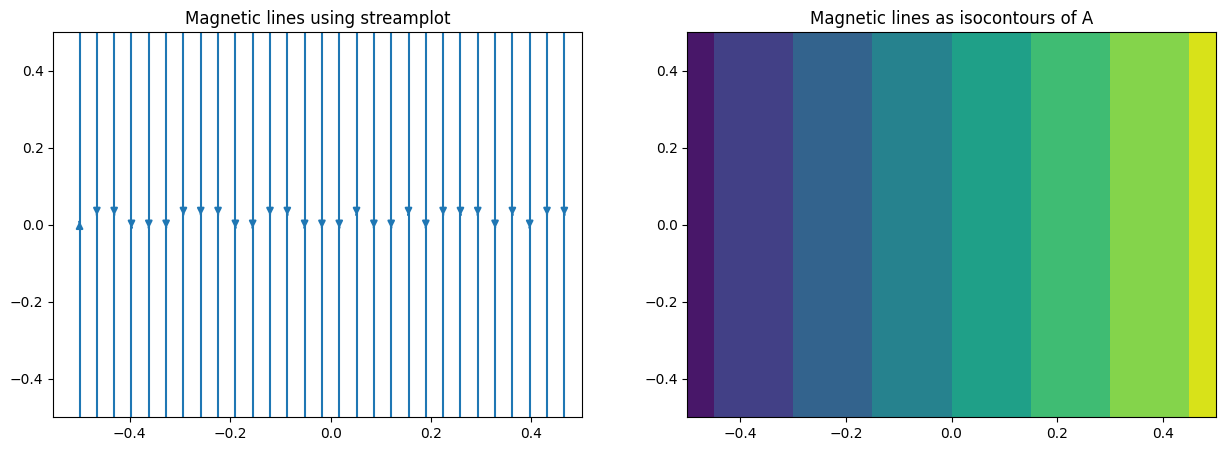

In [79]:
plt.figure(figsize=(15,5))
def deriv(f,ds):
    return (np.roll(f,-1,axis=1)-np.roll(f,+1,axis=1))/(2.0*ds)
#We calculate the magnetic field from A (bx = d_y A, by = -d_x A)
bx = 0*mesh.y 
by = -deriv(A0,mesh.dx)

plt.subplot(1,2,1)
plt.title("Magnetic lines using streamplot")
plt.streamplot(mesh.x,mesh.y,bx,by)

plt.subplot(1,2,2)
cp = plt.contourf(mesh.x, mesh.y, A0 )
plt.title("Magnetic lines as isocontours of A")
'''
plt.subplot(1,2,2)
plt.title("Magnetic lines as isocontours of A")
plt.contour([mesh.x, mesh.y,], A0)
'''
plt.show()

It is obvious that there is a change in the sign at the beginning of the plot. In order to intepret this behaviour, we need to focus on the definition of the derivative and the fact that the initial condition in the x direction is not periodic. Particularly, in order for the derivative be calculated at the beginning of the plot, it uses the information from the end of the plot. Thus, due to the non periodic form of the initial conditions, there is a change in the sign. Moreover, we could use the result ${\bf B}= \partial_x A =-c$ in order to explain such a behavior. 

### Task 7: Evolve the induction equation to find $A(t)$

In [38]:
class Transport():
    """
    This is the class we use to transport the vector potential
    """
    def advect(self,dt,axis):
        """
        1st order scheme "Donor cell"
        """
    
        if axis == 0:
            v = self.vy
            delta = self.mesh.dy

        if axis == 1:
            v = self.vx
            delta = self.mesh.dx
    
        pv = np.where(v>0)
        nv = np.where(v<=0)

        Am = np.roll(self.A, +1, axis=axis)
        Ap = np.roll(self.A, -1, axis=axis)

        self.A[pv] -= dt/delta*v[pv]*(self.A[pv]-Am[pv])
        self.A[nv] -= dt/delta*v[nv]*(Ap[nv]-self.A[nv])
    
    def __init__(self,mesh,vx,vy,A):

        #CFL condition
        self.dt = 0.5*np.sqrt(mesh.dx**2+mesh.dy**2)/np.max(np.sqrt(vx**2+vy**2))
        
        self.mesh = mesh
        self.vx = vx
        self.vy = vy
        self.A  = np.copy(A)
        
    def update(self,total_time):

        time = 0
        while(time < total_time):
        
            # We check we are beyond the requested output_time
            if time+self.dt > total_time:
                effective_dt = total_time-time
            else:
                effective_dt = self.dt
        
            # Simple operator split (first transport along X, then along Y)
            self.advect(effective_dt,axis=1)
            self.advect(effective_dt,axis=0)
            
            time += effective_dt

#### Example of use

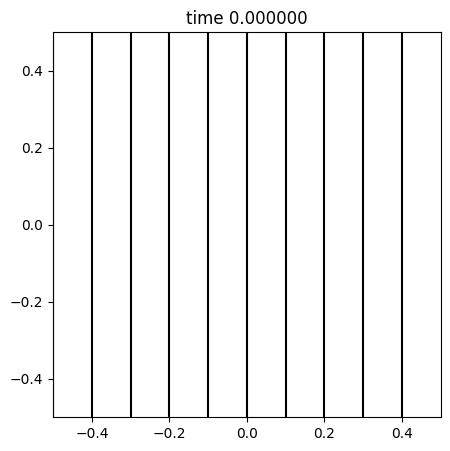

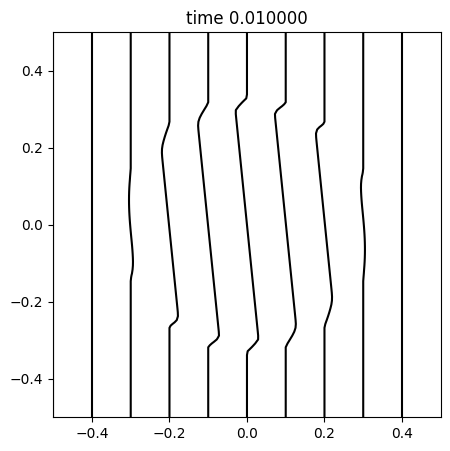

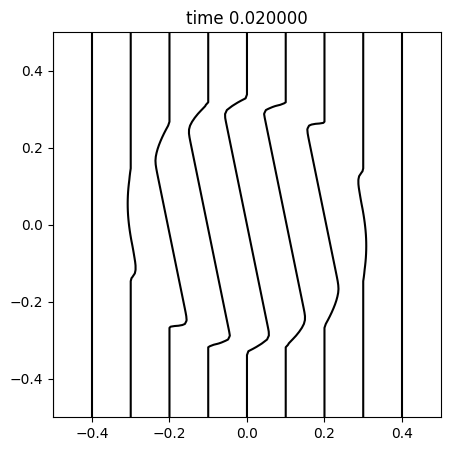

In [39]:
mesh  = Mesh(-0.5,0.5,-0.5,0.5,100,100)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 0.01   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 2      # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()

### Reconnection due to finite numerical resistivity

#### 7a) Use $\Omega_0 = 10$, $nx=ny=100$ and evolve $A$ by steps $\Delta t = 0.1$ until reaching a final time $t = 0.5$. For each step, plot the magentic line associated with the isocontours $A = 0$. 


    - What happens with the magnetic line? Is this what you expected from theoretical arguments?
    - Increase the number of grid-points to 400x400, what changes? Is this expected? Explain

#### First subtask of 7a


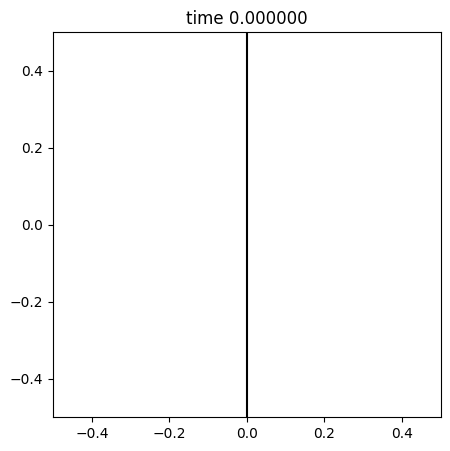

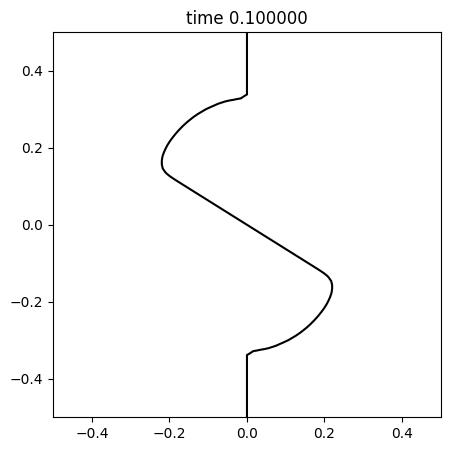

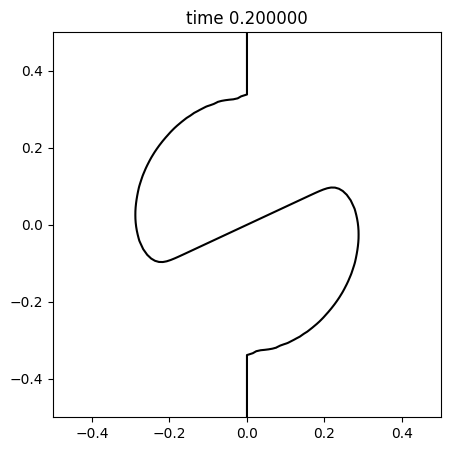

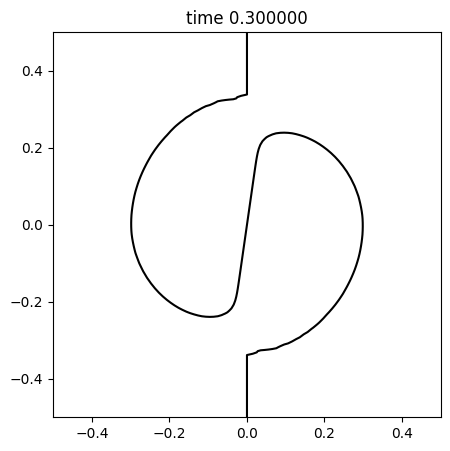

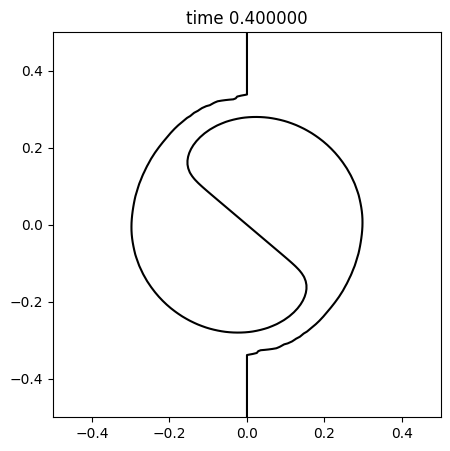

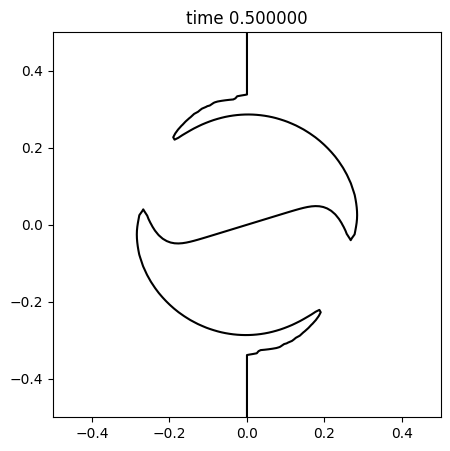

In [15]:
mesh  = Mesh(-0.5, 0.5, -0.5, 0.5, 100, 100)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh, vx, vy, A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = 0,colors='k',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 0.1   # Integration step (Note that it is usually larger than the CFL condion)
final_t = 0.5
nsteps = int(0.5 // 0.1 + 1)        # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = 0,colors='k',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()

We tried to plot the behaviour of a magnetic line which interacts with the above velocity field. It is obvious that the magnetic line is carried away by the movement being produced by the velocity field and it follows the "flow" that is produced. This is an effect of the flux freezing of the magnetic field, meaning that the magnetic field-magnetic lines are following the velocity field. So the result being displayed above is the one that we should expect.

#### Second subtask of 7a

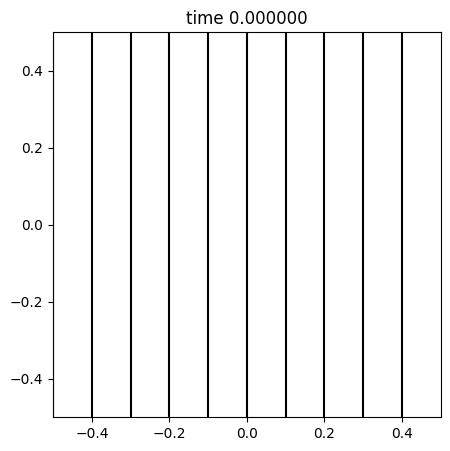

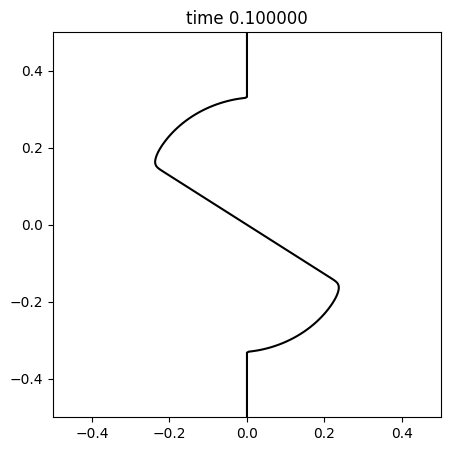

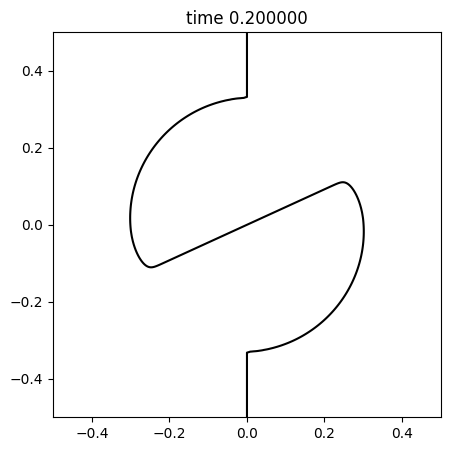

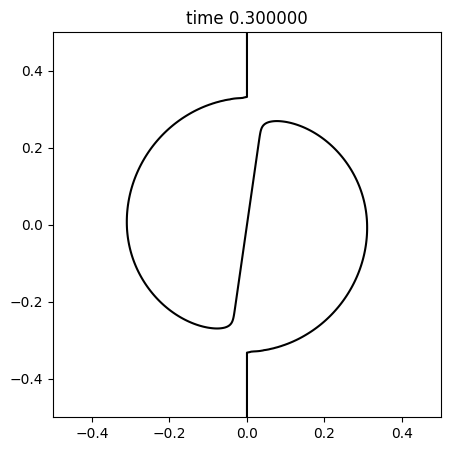

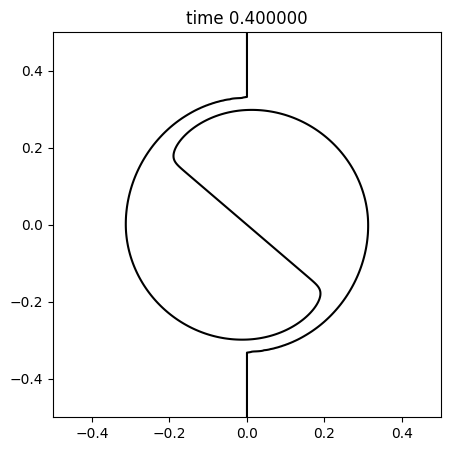

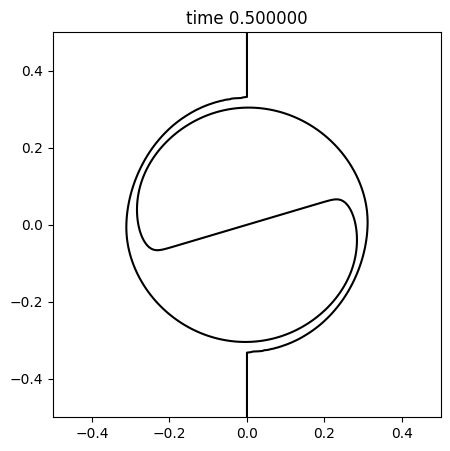

In [40]:
mesh  = Mesh(-0.5,0.5,-0.5,0.5,400,400)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh,vx,vy,A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x,transport.mesh.y,transport.A,10,colors='k',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 0.1   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 5      # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.A,0,colors='k',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()

In this subtask we followed the same procedure as we did in the former one, but now we increased the number of the grid points. In other words we increased the resolution of the system. A significant difference could be spotted along the time t=0.4 and t=0.5. Specifically, we could see that in the higher resolution case the isocontour line streches with the flow, something that doesn't occur in the first case ($n_{x}=n_{y}=100$) as it seems like it skips the one line. A reason is that the grid doesn't have enough πoints in order to resolve the solution of the system and thus plot it. Normally, one could say that in order to run the code for significant time we need enough grid points for aquiring the best resolution of the result

### Field expulsion due to numerical resitivity

We will study the steady-state solution of the system.

#### 7b) Use $n_x=n_y=200$ to evolve $A$ for a time $t=20$ by steps $\Delta t = 5$.  For each $\Delta t$, plot 20 magnetic lines in the range A=(-0.5,0.5).
    
Note that in steady-state, our problem reads:
\begin{equation}
{\bf v}\cdot \nabla A_z = 0
\end{equation}
However, magnetic lines are isocontours of A:
\begin{equation}
{\bf B}\cdot \nabla A_z = 0
\end{equation}
so, in steady-state, ${\bf B}$ and ${\bf v}$ are parallel. Does the steady-state numerical solution show that?

#### 7c) For t=20, plot the streamlines on top of the magnetic lines. What happened with the magnetic field in the rotating region? Explain.

#### 7b 


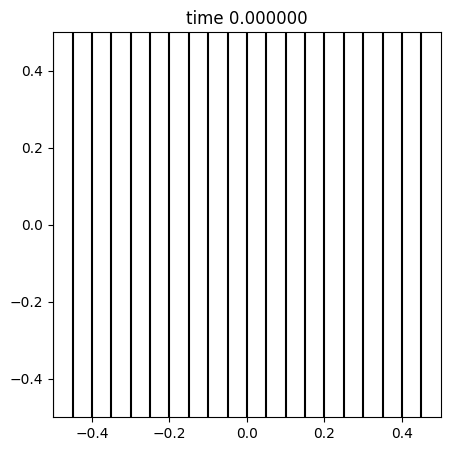

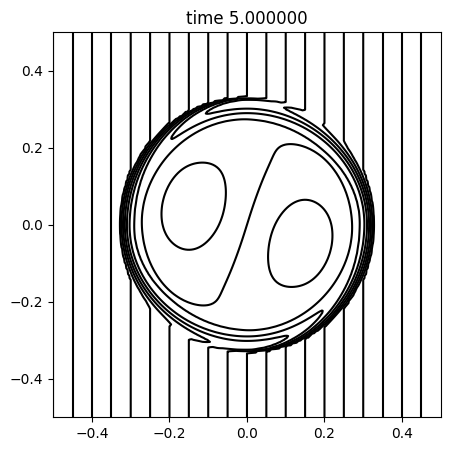

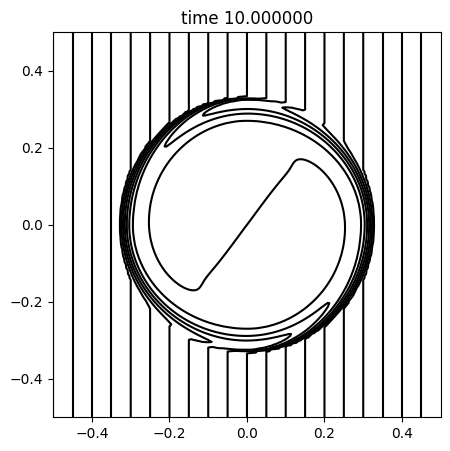

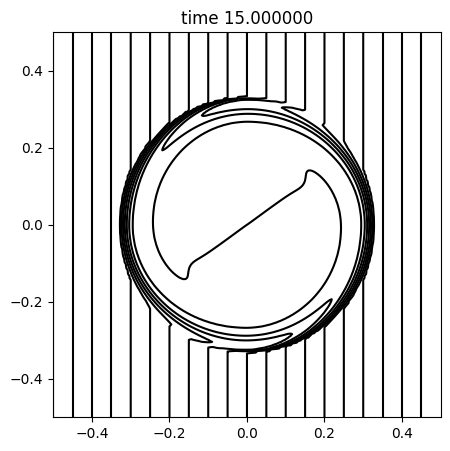

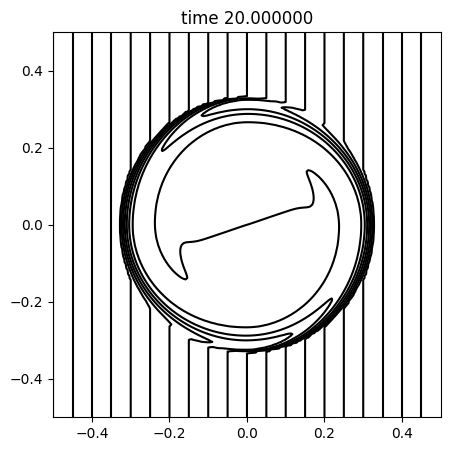

'                  \ntime = 0.0\ndt     = 5   # Integration step (Note that it is usually larger than the CFL condion)\nnsteps = 4      # Number of Integration steps\nfor i in range(nsteps):\n    transport.update(dt)\n    time+=dt\n    plt.contour(transport.mesh.x,transport.mesh.y,transport.vx,21,colors=\'r\',linestyles=\'solid\')\n    plt.title("time - velocity {:f}".format(time))\n'

In [20]:
mesh  = Mesh(-0.5, 0.5, -0.5, 0.5, 200, 200)     # We create the mesh
vx,vy = velocity_field(mesh, 0.3, 10.0)     # We initialize a velocity field
A     = mesh.x                              # Initial condition for the vector potential

transport = Transport(mesh, vx, vy, A)         # Instantiate the Transport class

# Plot the initial condition
time = 0.0
plt.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = 20, colors='k',linestyles='solid')
plt.title("time {:f}".format(time))
plt.show()

# Advance the induction equation
dt     = 5   # Integration step (Note that it is usually larger than the CFL condion)
final_t = 20
nsteps = int(final_t // dt)        # Number of Integration steps

for i in range(nsteps):
    transport.update(dt)
    
    # Plot the evolution of the magnetic lines
    time += dt
    plt.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = 20 ,colors='k',linestyles='solid')
    plt.title("time {:f}".format(time))
    plt.show()
'''       
        
#7c        
time = 0.0        
plt.streamplot(transport.mesh.x,mesh.y,transport.mesh.dx*transport.A,-transport.mesh.dy*transport.A)
plt.title("time {:f}".format(time))
plt.show()       
time = 0.0
dt     = 5   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 4      # Number of Integration steps
for i in range(nsteps):
    transport.update(dt)
    time+=dt
    plt.streamplot(transport.mesh.x,mesh.y,transport.mesh.dx*transport.A,-transport.mesh.dy*transport.A)
    plt.title("time-streamlines {:f}".format(time))
        
  '''      
'''                  
time = 0.0
dt     = 5   # Integration step (Note that it is usually larger than the CFL condion)
nsteps = 4      # Number of Integration steps
for i in range(nsteps):
    transport.update(dt)
    time+=dt
    plt.contour(transport.mesh.x,transport.mesh.y,transport.vx,21,colors='r',linestyles='solid')
    plt.title("time - velocity {:f}".format(time))
'''

Text(0.5, 1.0, 'time 20.000000')

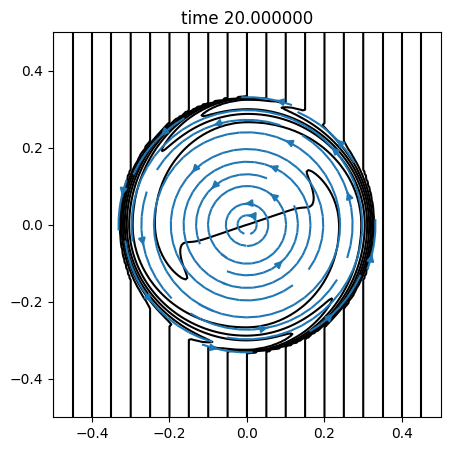

In [21]:
plt.contour(transport.mesh.x, transport.mesh.y, transport.A, levels = 20 ,colors='k',linestyles='solid')
plt.streamplot(transport.mesh.x, transport.mesh.y, transport.vx, transport.vy)
plt.title("time {:f}".format(time))

Accroding to the above plot, it is obvious that the magnetic field is parallel to the vector field, due to the flux freezing of the magnetic field. So the numerical steady-state solution shows that. Apparently, the magnetic lines by following the velocity field, are spinning and at the rotation region, one could observe that in the circle outline black areas have been created. This happening as, during the rotation of the magnetic lines, they are accumulated at this region meaning that the intensity of the magnetic field is increased.